In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#loading the dataset
df=pd.read_csv("/content/PaySim transaction dataset.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# using the 'pandas.DataFrame.to_csv' method to save our dataset to a CSV file:

df.to_csv('/savedPaySim transaction dataset.csv.csv', index=False)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
# Exploratory Data Analysis (EDA)

print(df.head())  # To display the first few rows of the dataset


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.info())  # To get information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
# Summary statistics of the dataset
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Get the Summary of 'Numerical' attributes
desc_df_num = df.describe([.25, .5, .75])
desc_df_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Get the Summary of 'Categorical' columns:
desc_df_cat = df.describe(include="object")
desc_df_cat

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [ ]:
# Checking for missing values
df.isnull().values.any()

False

<ipython-input-14-9705d3702617>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


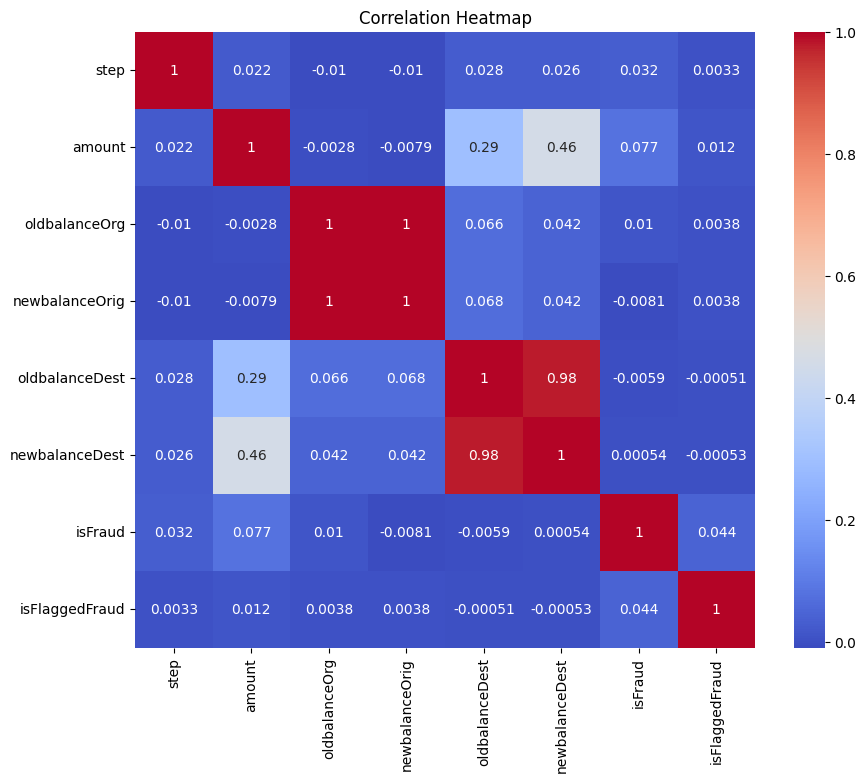

In [ ]:
### VISUALIZATIONS

# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Get fraud label distribution
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

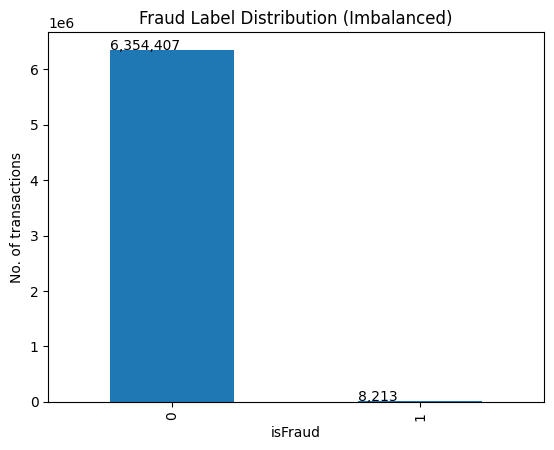

In [ ]:
# We only have ~0.13% fraudulent transactions in our dataset
# (as would be the case in the real world), which creates an imbalance in our class variable

axes = pd.value_counts(df['isFraud'], sort = True).sort_index().plot(kind = 'bar', title = 'Fraud Label Distribution (Imbalanced)')

for p in axes.patches:
    axes.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
    axes.set_xlabel('isFraud')
    axes.set_ylabel('No. of transactions')
plt.show()

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: >

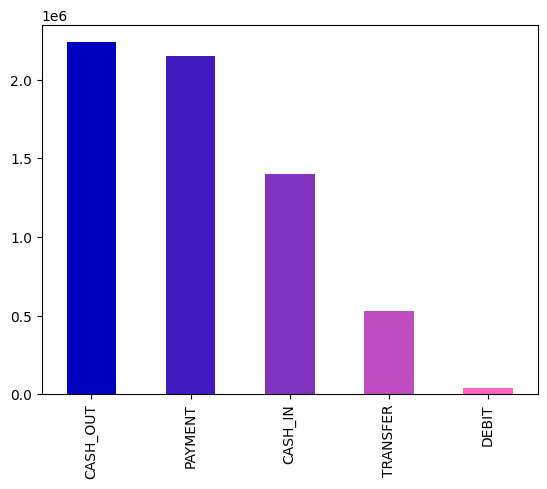

In [ ]:
plotColours = [(x/4, x/10, 0.75) for x in range(10)]
df['type'].value_counts().plot.bar(color = plotColours)

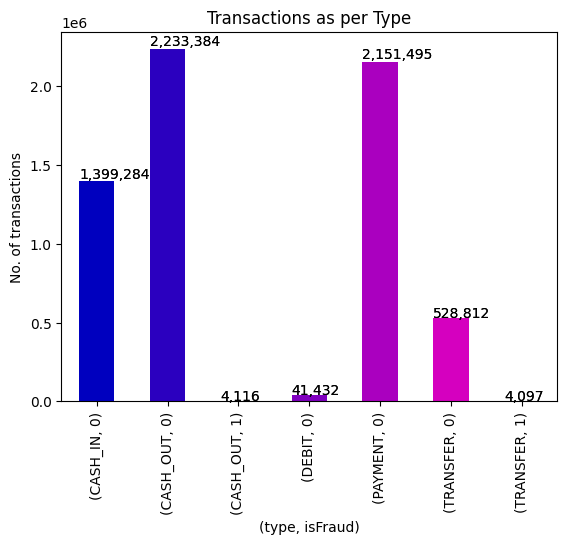

In [ ]:
plotColours = [(x/6, x/10000, 0.75) for x in range(10)]
axes = df.groupby(['type', 'isFraud']).size().plot.bar(color = {'violet', 'green', 'purple', 'orange', 'teal', 'brown'})
axes = df.groupby(['type', 'isFraud']).size().plot.bar(color = plotColours)
axes.set_title('Transactions as per Type')
axes.set_xlabel('(type, isFraud)')
axes.set_ylabel('No. of transactions')
for p in axes.patches:
    axes.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [ ]:
# The plot above shows that only type CASH_OUT and type TRANSFER transactions can be fraudulent, and we can therefore
# remove the entries which have a different transaction type.

df = df.loc[~(df['type'].isin(['CASH_IN', 'DEBIT', 'PAYMENT']))]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
# Drop the column "isFlaggedFraud" because according to the data understanding, it is a repetition of the column "isFraud"
df = df.drop(columns=['isFlaggedFraud'])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


CASH_OUT    0.501157
TRANSFER    0.498843
Name: type, dtype: float64

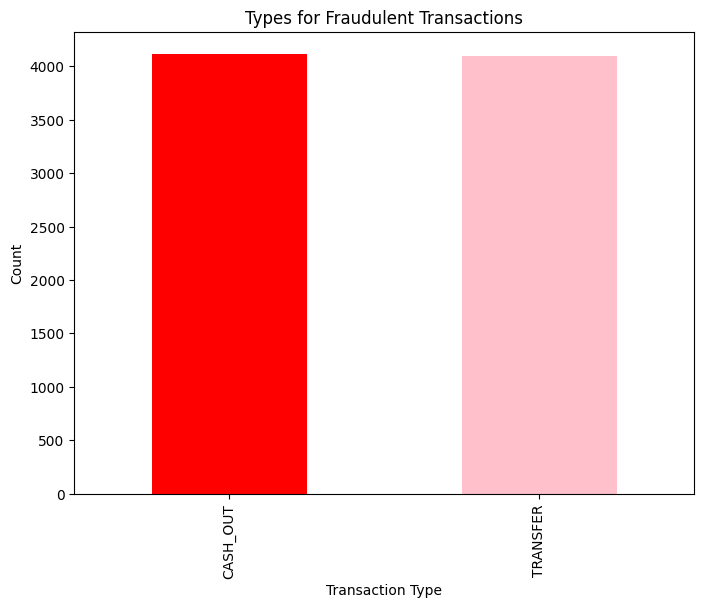

In [ ]:
# Only the transactions of CASH_OUT type and TRANSFER type are retained in out dataframe now, and the updated dataframe
# now has a total of 2770409 transactions, the data which earlier had >6mil tuples.

# We can now check the percentge of fraudulent transactions shared among these two categories for a better understanding
# of the distribution of the same.

data_fraud = df[df.isFraud == 1]
display(data_fraud.type.value_counts(normalize=True))
type_counts = data_fraud.type.value_counts()

plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['red', 'pink'])
plt.title('Types for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

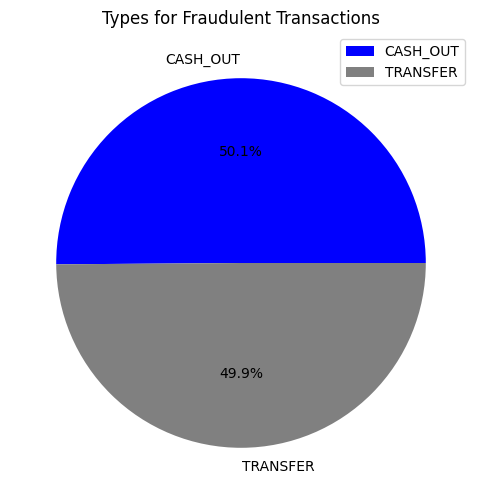

In [ ]:
data_fraud = df[df.isFraud == 1]

type_counts = data_fraud.type.value_counts()

plt.figure(figsize=(8, 6))
colors = ['blue', 'gray']
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Types for Fraudulent Transactions')
plt.ylabel(None)  # Remove y-label
plt.legend(type_counts.index, loc='best')  # Add legend
plt.show()

In [ ]:
# From the above chart and figures, isFraud = 1 transactions are almost equally distributed among type CASH_OUT
# and TRANSFER at 50.1% and 49.9% respectively.

# We will move on to checking the transactions where amount = 0

df_zeroAmtTxns = df.loc[df['amount'] == 0]
len(df_zeroAmtTxns), df_zeroAmtTxns[['type', 'isFraud']]

(16,
              type  isFraud
 2736447  CASH_OUT        1
 3247298  CASH_OUT        1
 3760289  CASH_OUT        1
 5563714  CASH_OUT        1
 5996408  CASH_OUT        1
 5996410  CASH_OUT        1
 6168500  CASH_OUT        1
 6205440  CASH_OUT        1
 6266414  CASH_OUT        1
 6281483  CASH_OUT        1
 6281485  CASH_OUT        1
 6296015  CASH_OUT        1
 6351226  CASH_OUT        1
 6362461  CASH_OUT        1
 6362463  CASH_OUT        1
 6362585  CASH_OUT        1)

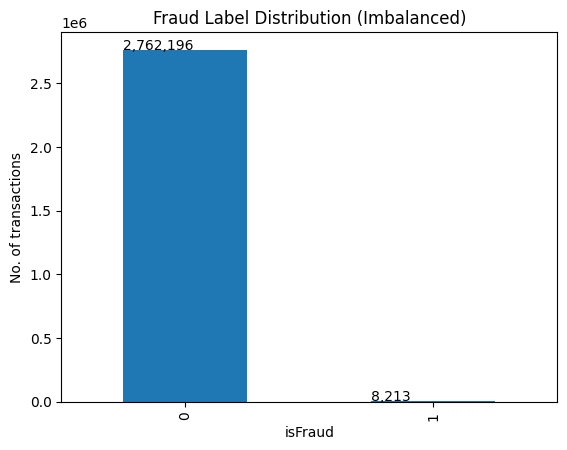

In [ ]:
## Checking to see if the removal of some "type" helped balance our data
axes = pd.value_counts(df['isFraud'], sort = True).sort_index().plot(kind = 'bar', title = 'Fraud Label Distribution (Imbalanced)')

for p in axes.patches:
    axes.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
    axes.set_xlabel('isFraud')
    axes.set_ylabel('No. of transactions')
plt.show()

In [ ]:
# Get fraud label distribution
df.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

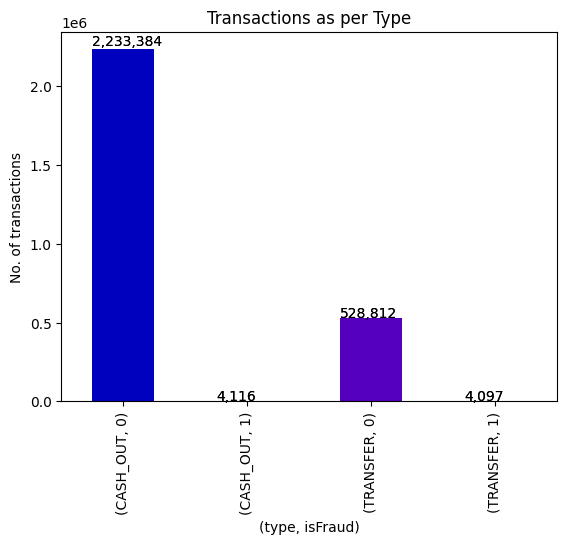

In [ ]:
plotColours = [(x/6, x/10000, 0.75) for x in range(10)]
axes = df.groupby(['type', 'isFraud']).size().plot.bar(color = {'violet', 'green', 'purple', 'orange', 'teal', 'brown'})
axes = df.groupby(['type', 'isFraud']).size().plot.bar(color = plotColours)
axes.set_title('Transactions as per Type')
axes.set_xlabel('(type, isFraud)')
axes.set_ylabel('No. of transactions')
for p in axes.patches:
    axes.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

From the above our dataset is still imbalanced

In [ ]:
# According to our dataset explanation on kaggle.com the author mentioned that transactions which are detected as fraud are
# cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest )
# must not be used. With this statement in mind, we would drop the columns.

# (Exclude columns: oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, nameOrig)
selected_features = ['step', 'type', 'amount']


In [ ]:
# Preprocess the data
X = df[selected_features]
y = df['isFraud']


In [ ]:
# Encode 'type' using Label Encoding
type_encoder = LabelEncoder()
X['type_encoded'] = type_encoder.fit_transform(df['type'])


<ipython-input-30-bf8301e4bc40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type_encoded'] = type_encoder.fit_transform(df['type'])


In [ ]:
# Drop the original 'type' column
X.drop(['type'], axis=1, inplace=True)


<ipython-input-31-59cc60d91e38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['type'], axis=1, inplace=True)


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from collections import Counter



In [ ]:
# Split the data manually into training and testing sets
split_ratio = 0.7  # 70% for training, 30% for testing
split_index = int(len(X) * split_ratio)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

In [ ]:
# Trying oversampling again

from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Oversampled class distribution:", Counter(y_oversampled))


Original class distribution: Counter({0: 1935653, 1: 3633})
Oversampled class distribution: Counter({1: 1935653, 0: 1935653})


-

MACHINE LEARNING MODELS

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter options for Random Forest and XGBoost
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
}

# Train models on oversampled data
results_oversampled = []

for model_name, model in models:
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_oversampled, y_oversampled)

        model = grid_search.best_estimator_
    else:
        model.fit(X_oversampled, y_oversampled)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    results_oversampled.append((model_name, accuracy, cm, report, roc_auc, fpr, tpr))
    print(f"{model_name}: Accuracy = {accuracy:.4f}, AUC-ROC = {roc_auc:.4f}")
    print(report)


Logistic Regression: Accuracy = 0.9491, AUC-ROC = 0.4959
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    826543
           1       0.03      0.24      0.05      4580

    accuracy                           0.95    831123
   macro avg       0.51      0.59      0.51    831123
weighted avg       0.99      0.95      0.97    831123

Random Forest: Accuracy = 0.9951, AUC-ROC = 0.6199
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.97      0.12      0.21      4580

    accuracy                           1.00    831123
   macro avg       0.98      0.56      0.60    831123
weighted avg       0.99      1.00      0.99    831123

Decision Tree: Accuracy = 0.9947, AUC-ROC = 0.5689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.56      0.14      0.22      4580

    accuracy           

In [ ]:
# Train models on oversampled data
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Neural Network', MLPClassifier()),


]


results_oversampled = []

for model_name, model in models:
    model.fit(X_oversampled, y_oversampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    results_oversampled.append((model_name, accuracy, cm, report, roc_auc, fpr, tpr))
    print(f"{model_name}: Accuracy = {accuracy:.4f}, AUC-ROC = {roc_auc:.4f}")
    print(report)



Logistic Regression: Accuracy = 0.9491, AUC-ROC = 0.4959
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    826543
           1       0.03      0.24      0.05      4580

    accuracy                           0.95    831123
   macro avg       0.51      0.59      0.51    831123
weighted avg       0.99      0.95      0.97    831123

Random Forest: Accuracy = 0.9952, AUC-ROC = 0.6221
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.95      0.13      0.23      4580

    accuracy                           1.00    831123
   macro avg       0.97      0.56      0.61    831123
weighted avg       0.99      1.00      0.99    831123

Decision Tree: Accuracy = 0.9947, AUC-ROC = 0.5689
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.56      0.14      0.22      4580

    accuracy           

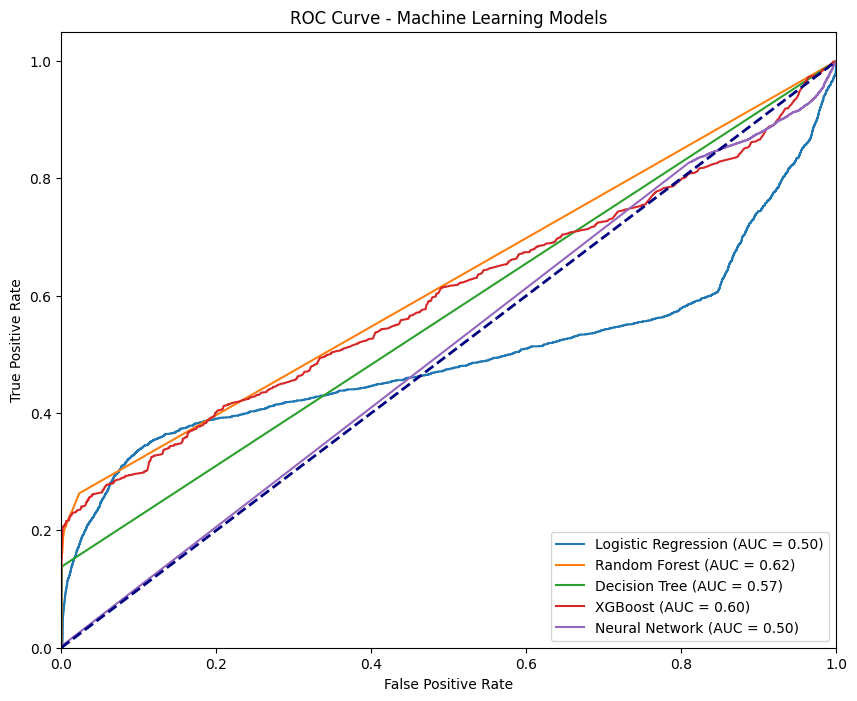

In [ ]:
# Visualize ROC curves
plt.figure(figsize=(10, 8))
for model_name, _, _, _, auc_score, fpr, tpr in results_oversampled:
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Machine Learning Models')
plt.legend(loc='lower right')
plt.show()

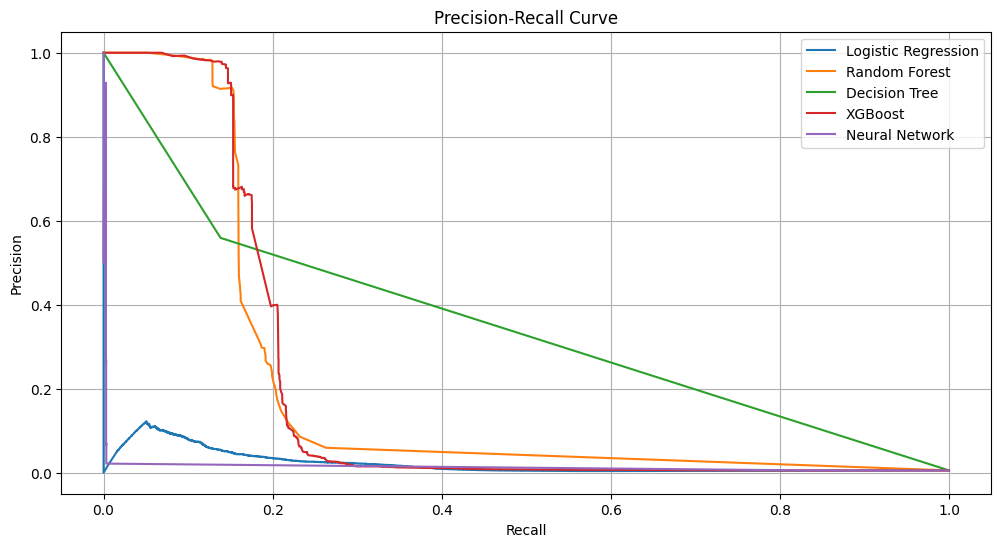

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 6))

for model_name, _, _, _, _, _, _ in results_oversampled:
    model = None
    for model_tuple in models:
        if model_tuple[0] == model_name:
            model = model_tuple[1]
            break

    if model is None:
        continue

    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

    plt.plot(recall, precision, label=f'{model_name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


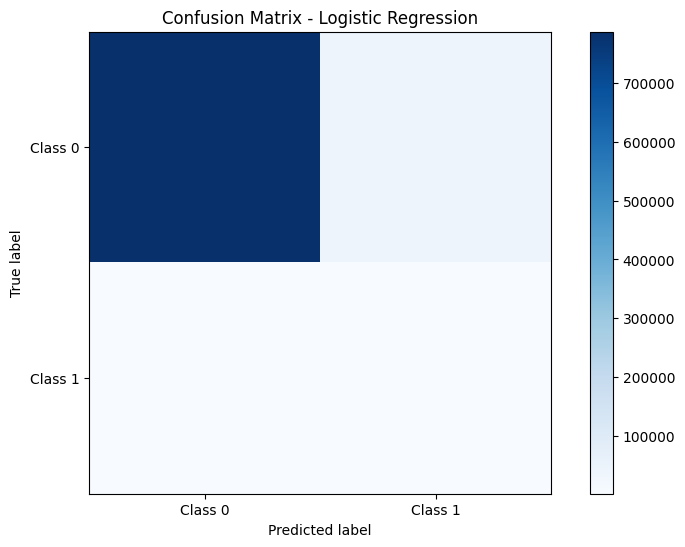

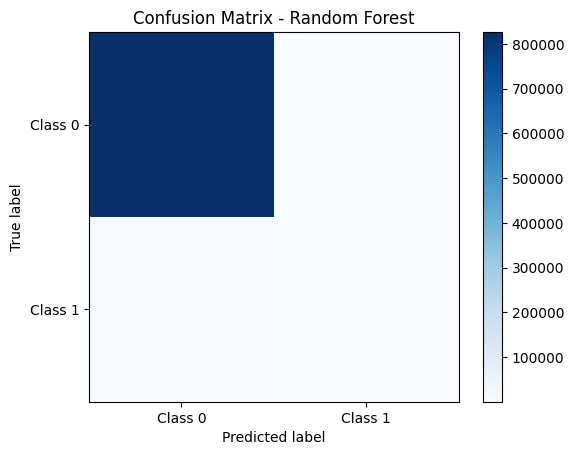

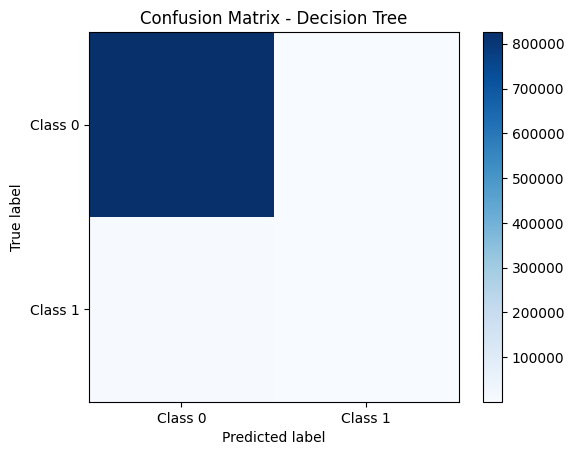

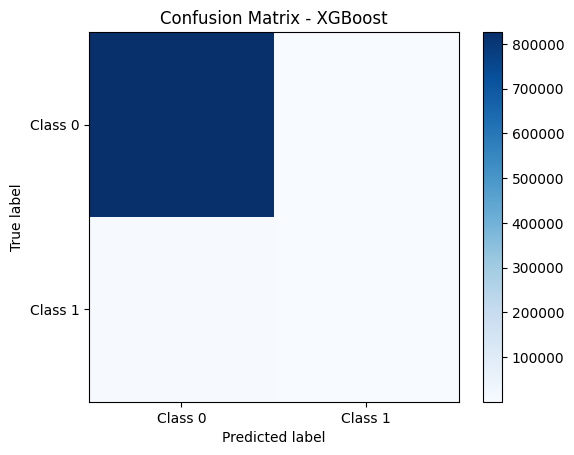

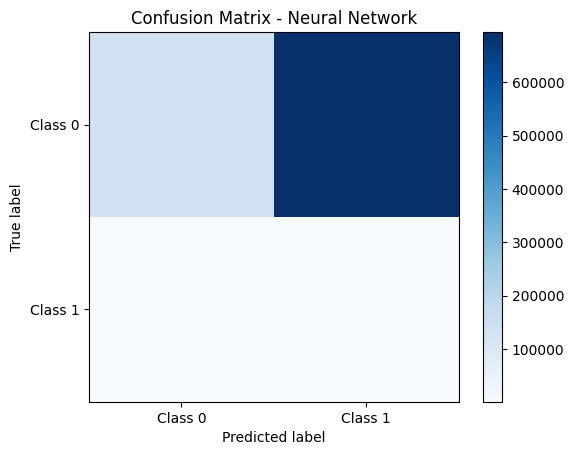

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(10, 6))

for model_name, _, cm, _, _, _, _ in results_oversampled:
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks(np.arange(2), ['Class 0', 'Class 1'])
    plt.yticks(np.arange(2), ['Class 0', 'Class 1'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

DEEP LEARNING MODELS

In [ ]:
pip install keras

In [ ]:
pip install transformers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Bidirectional, LSTM

In [ ]:
# Deep Learning Models (FNN, RNN, CNN, Vanilla LSTM, Bidirectional-LSTM and Stacked LSTM)

from keras.layers import LSTM, Input, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from transformers import TFAutoModel
from transformers import TFBertForSequenceClassification

# Convert DataFrame to NumPy array
X_oversampled_array = X_oversampled.to_numpy()

# Reshape X_oversampled_array to include a third dimension for time steps
X_oversampled_reshaped = X_oversampled_array.reshape(X_oversampled_array.shape[0], X_oversampled_array.shape[1], 1)

# Train deep learning models
deep_models = [
    ('Feedforward Neural Network', Sequential([
        Dense(128, activation='relu', input_dim=X_oversampled.shape[1]),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])),
    ('Recurrent Neural Network (LSTM)', Sequential([
        LSTM(128, input_shape=(X_oversampled.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])),
    ('Vanilla LSTM', Sequential([
        LSTM(128, input_shape=(X_oversampled.shape[1], 1)),
        Dense(1, activation='sigmoid')
    ])),
    ('Bidirectional LSTM', Sequential([
        Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(X_oversampled_reshaped.shape[1], X_oversampled_reshaped.shape[2])),
        LSTM(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])),
    ('Stacked LSTM', Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_oversampled_reshaped.shape[1], X_oversampled_reshaped.shape[2])),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]))
]


results_deep = []

for model_name, model in deep_models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_oversampled, y_oversampled, epochs=10, batch_size=128, verbose=1)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))

    results_deep.append((model_name, accuracy, cm, report, roc_auc, fpr, tpr))
    print(f"{model_name}: Accuracy = {accuracy:.4f}, AUC-ROC = {roc_auc:.4f}")
    print(report)


Epoch 1/10
30245/30245 [==============================] - 64s 2ms/step - loss: 241.1785 - accuracy: 0.5687
Epoch 2/10
30245/30245 [==============================] - 59s 2ms/step - loss: 0.7011 - accuracy: 0.5015
Epoch 3/10
30245/30245 [==============================] - 58s 2ms/step - loss: 0.7025 - accuracy: 0.5007
Epoch 4/10
30245/30245 [==============================] - 58s 2ms/step - loss: 0.6971 - accuracy: 0.5011
Epoch 5/10
30245/30245 [==============================] - 58s 2ms/step - loss: 0.7058 - accuracy: 0.5007
Epoch 6/10
30245/30245 [==============================] - 56s 2ms/step - loss: 0.6924 - accuracy: 0.5010
Epoch 7/10
30245/30245 [==============================] - 54s 2ms/step - loss: 0.6947 - accuracy: 0.5010
Epoch 8/10
30245/30245 [==============================] - 54s 2ms/step - loss: 0.7148 - accuracy: 0.5011
Epoch 9/10
30245/30245 [==============================] - 54s 2ms/step - loss: 0.7002 - accuracy: 0.5014
Epoch 10/10
25973/25973 [============================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   97/25973 [..............................] - ETA: 27s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25973/25973 [==============================] - 26s 1ms/step
Feedforward Neural Network: Accuracy = 0.9945, AUC-ROC = 0.5000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    826543
           1       0.00      0.00      0.00      4580

    accuracy                           0.99    831123
   macro avg       0.50      0.50      0.50    831123
weighted avg       0.99      0.99      0.99    831123

Epoch 1/10
30245/30245 [==============================] - 228s 7ms/step - loss: 0.5864 - accuracy: 0.6369
Epoch 2/10
30245/30245 [==============================] - 230s 8ms/step - loss: 0.5680 - accuracy: 0.6531
Epoch 3/10
30245/30245 [==============================] - 229s 8ms/step - loss: 0.5646 - accuracy: 0.6567
Epoch 4/10
30245/30245 [==============================] - 216s 7ms/step - loss: 0.5647 - accuracy: 0.6567
Epoch 5/10
30245/30245 [==============================] - 212s 7ms/step - loss: 0.5674 - accuracy: 0.6503
Epoch 6/10
30245/30

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   21/25973 [..............................] - ETA: 1:06 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25973/25973 [==============================] - 65s 3ms/step
Bidirectional LSTM: Accuracy = 0.0055, AUC-ROC = 0.5007
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    826543
           1       0.01      1.00      0.01      4580

    accuracy                           0.01    831123
   macro avg       0.00      0.50      0.01    831123
weighted avg       0.00      0.01      0.00    831123

Epoch 1/10
30245/30245 [==============================] - 346s 11ms/step - loss: 50.8395 - accuracy: 0.6677
Epoch 2/10
30245/30245 [==============================] - 334s 11ms/step - loss: 5.5076 - accuracy: 0.6828
Epoch 3/10
30245/30245 [==============================] - 333s 11ms/step - loss: 0.5718 - accuracy: 0.7439
Epoch 4/10
30245/30245 [==============================] - 347s 11ms/step - loss: 88.1106 - accuracy: 0.7026
Epoch 5/10
30245/30245 [==============================] - 360s 12ms/step - loss: 129.2880 - accuracy: 0.6684
Epoch 6/10
30245/3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   16/25973 [..............................] - ETA: 1:26 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25973/25973 [==============================] - 82s 3ms/step
Stacked LSTM: Accuracy = 0.9945, AUC-ROC = 0.5000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    826543
           1       0.00      0.00      0.00      4580

    accuracy                           0.99    831123
   macro avg       0.50      0.50      0.50    831123
weighted avg       0.99      0.99      0.99    831123



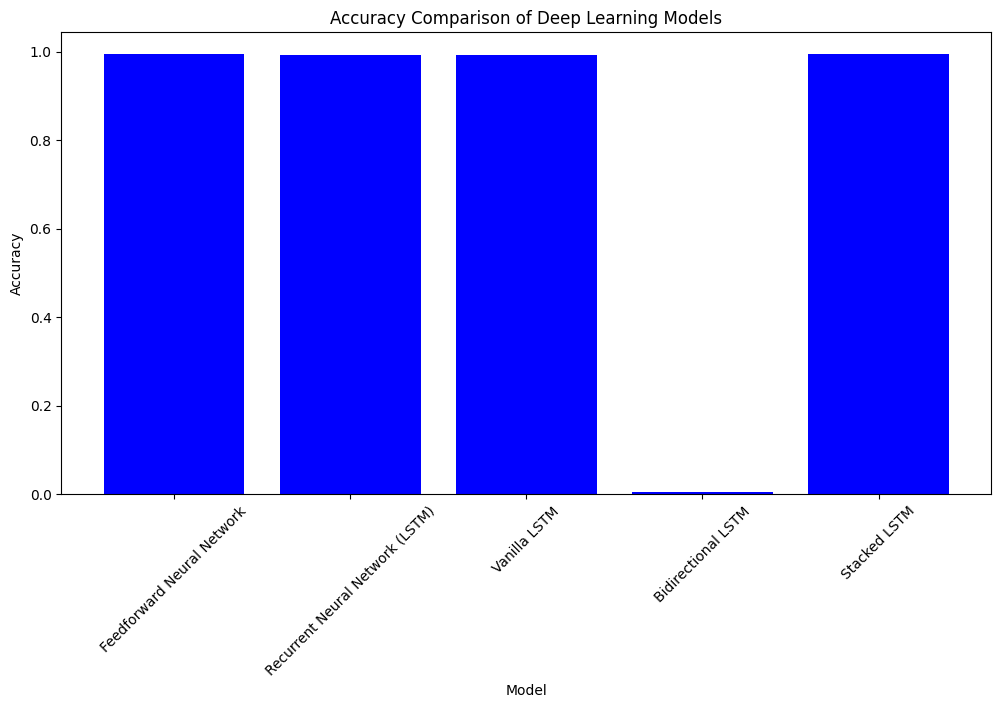

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Assuming you already have 'results_deep' containing your deep learning model results

model_names = [model_tuple[0] for model_tuple in deep_models]
accuracies = [result[1] for result in results_deep]
auc_rocs = [result[4] for result in results_deep]

# Plot Accuracies
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Deep Learning Models')
plt.xticks(rotation=45)
plt.show()



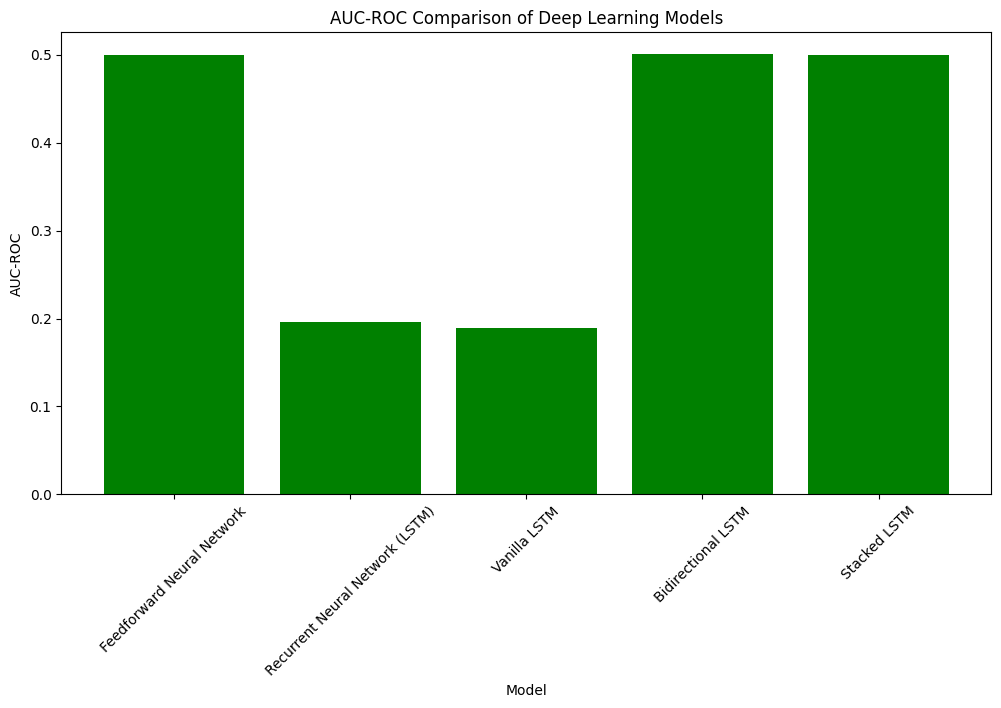

In [ ]:
# Plot AUC-ROCs
plt.figure(figsize=(12, 6))
plt.bar(model_names, auc_rocs, color='green')
plt.xlabel('Model')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC Comparison of Deep Learning Models')
plt.xticks(rotation=45)
plt.show()



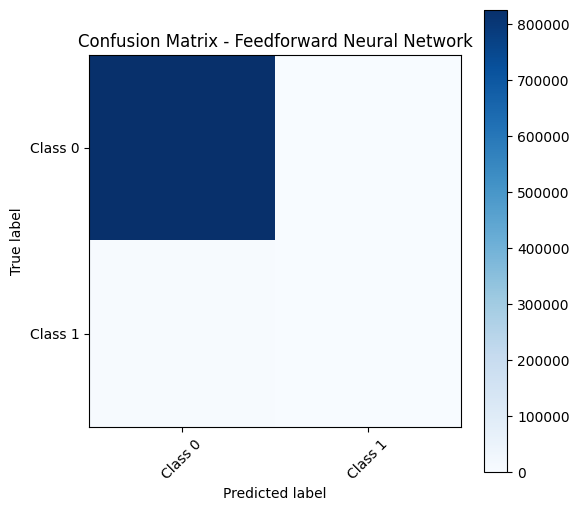

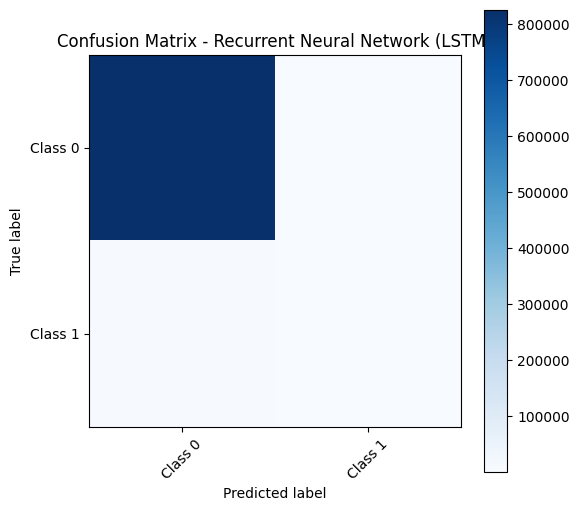

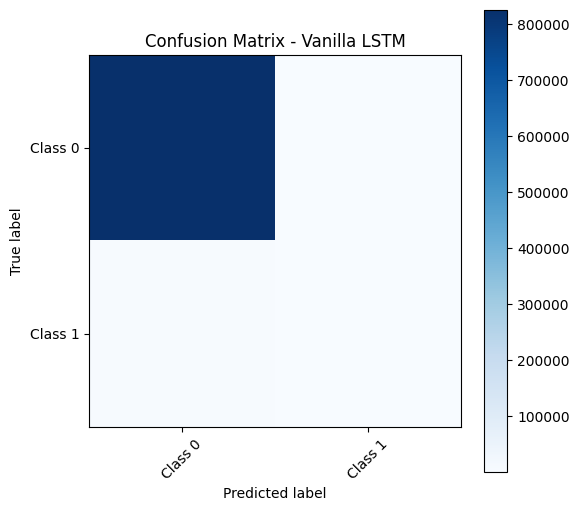

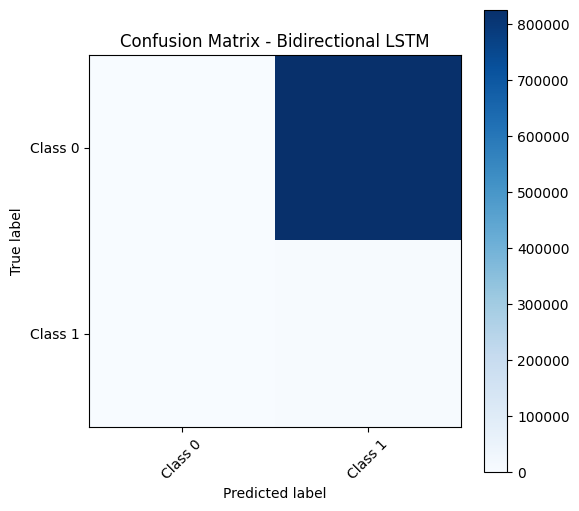

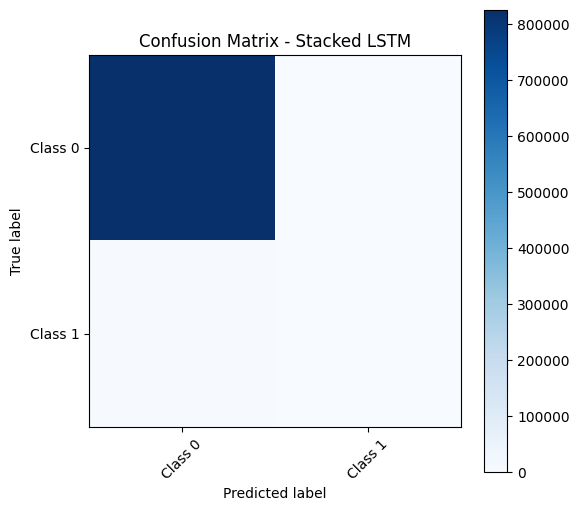

In [ ]:
# Visualize Confusion Matrices
for model_name, _, cm, _, _, _, _ in results_deep:
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    classes = ['Class 0', 'Class 1']
    plt.xticks(np.arange(2), classes, rotation=45)
    plt.yticks(np.arange(2), classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


HYBRID MODEL

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from keras.layers import LSTM, Input, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Bidirectional, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional



In [ ]:

# Create a list of trained models
estimators = [('Random Forest', RandomForestClassifier()),
              ('XGBoost', XGBClassifier())
             ]

# Instantiate the VotingClassifier
voting_classifier = VotingClassifier(estimators, voting='hard')  # 'hard' for predictive-based voting

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the VotingClassifier
y_pred = voting_classifier.predict(X_test)

# Print the results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Voting Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)


Voting Classifier Results:
Accuracy: 0.9953
AUC-ROC: 0.5773
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.97      0.15      0.27      4580

    accuracy                           1.00    831123
   macro avg       0.98      0.58      0.63    831123
weighted avg       1.00      1.00      0.99    831123



In [ ]:

# Create a list of trained models
estimators = [('Random Forest', RandomForestClassifier()),
              ('XGBoost', XGBClassifier())
              ('Feedforward Neural Network', Sequential([
        Dense(128, activation='relu', input_dim=X_oversampled.shape[1]),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')))]
             ]

# Instantiate the VotingClassifier
voting_classifier = VotingClassifier(estimators, voting='hard')  # 'hard' for predictive-based voting

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the VotingClassifier
y_pred = voting_classifier.predict(X_test)

# Print the results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Voting Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)


In [ ]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Voting Classifier')
plt.colorbar()
classes = ['Class 0', 'Class 1']
plt.xticks(np.arange(2), classes, rotation=45)
plt.yticks(np.arange(2), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve for the Voting Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Voting Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve for the Voting Classifier
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Voting Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
model_names = [model[0] for model in models]
auc_roc_scores = [result[4] for result in results_oversampled]

plt.figure(figsize=(10, 6))
plt.bar(model_names, auc_roc_scores)
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score Comparison')
plt.xticks(rotation=45)
plt.show()


In [ ]:
accuracy_scores = [result[1] for result in results_oversampled]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.xticks(rotation=45)
plt.show()


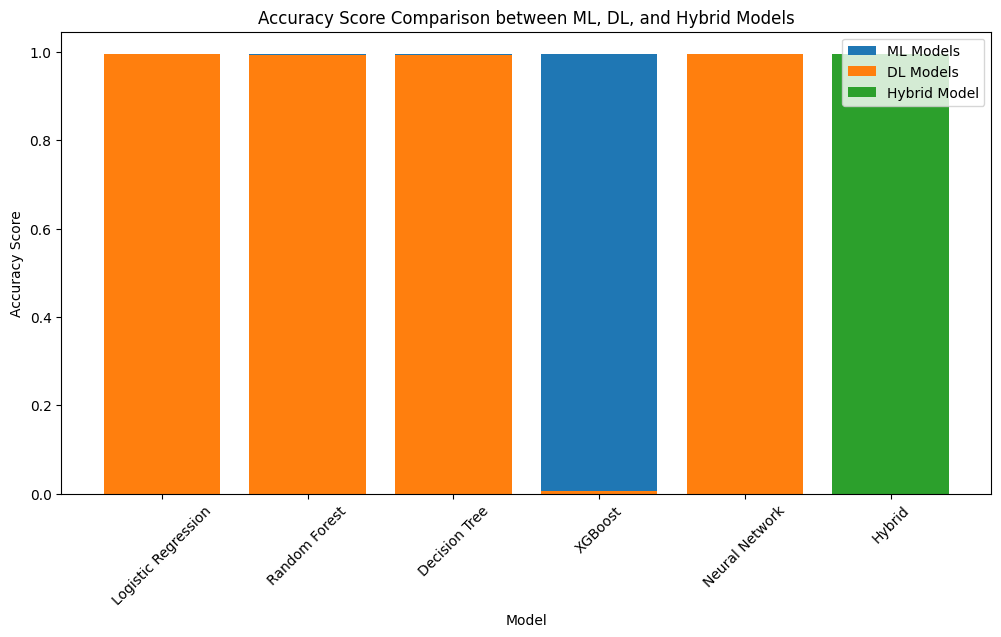

In [ ]:
model_names = [model_tuple[0] for model_tuple in models]
ml_accuracy_scores = [result[1] for result in results_oversampled]
dl_accuracy_scores = [result[1] for result in results_deep]
hybrid_accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.bar(model_names, ml_accuracy_scores, label='ML Models')
plt.bar(model_names, dl_accuracy_scores, label='DL Models')
plt.bar(['Hybrid'], [hybrid_accuracy], label='Hybrid Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()


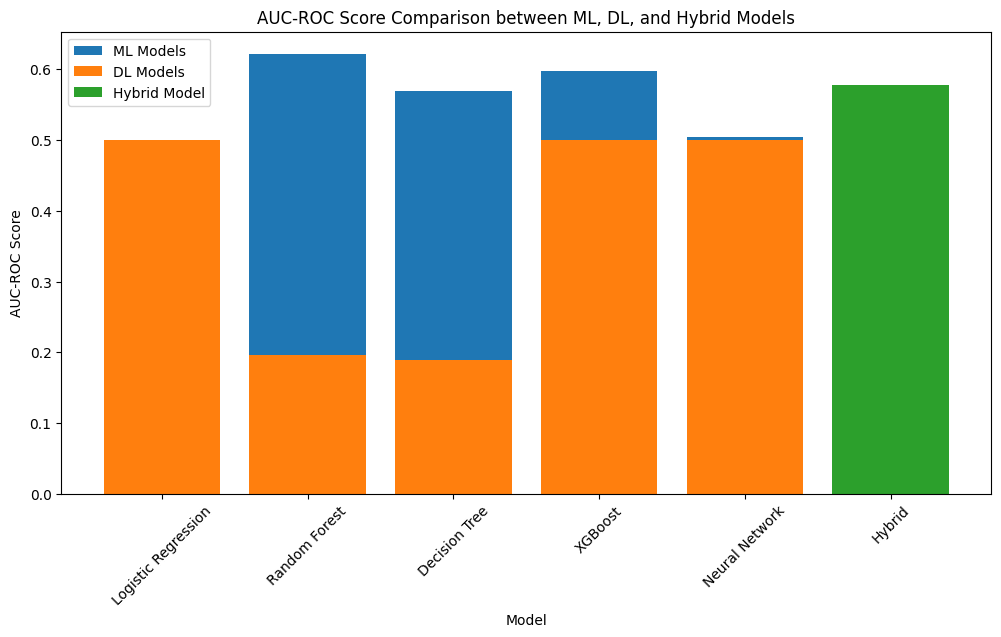

In [ ]:
ml_auc_roc_scores = [result[4] for result in results_oversampled]
dl_auc_roc_scores = [result[4] for result in results_deep]
hybrid_auc_roc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.bar(model_names, ml_auc_roc_scores, label='ML Models')
plt.bar(model_names, dl_auc_roc_scores, label='DL Models')
plt.bar(['Hybrid'], [hybrid_auc_roc], label='Hybrid Model')
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()


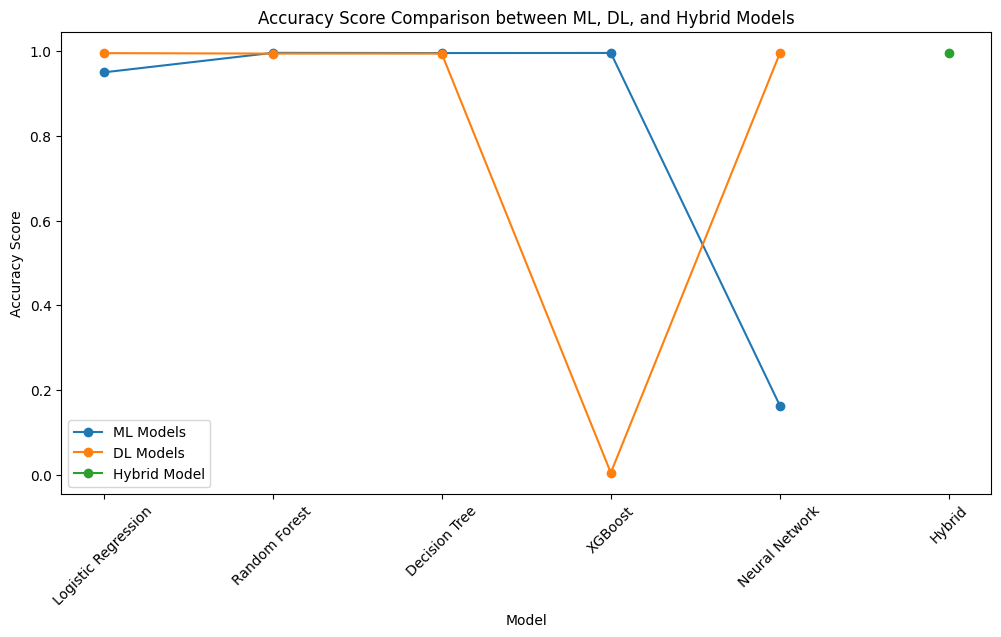

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(model_names, ml_accuracy_scores, marker='o', label='ML Models')
plt.plot(model_names, dl_accuracy_scores, marker='o', label='DL Models')
plt.plot(['Hybrid'], [hybrid_accuracy], marker='o', label='Hybrid Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()


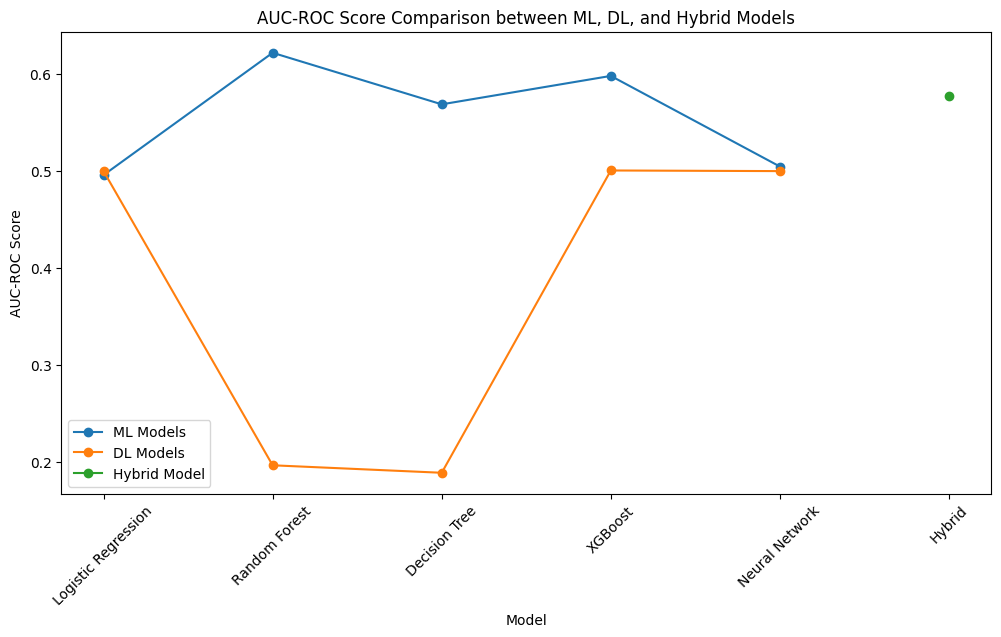

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(model_names, ml_auc_roc_scores, marker='o', label='ML Models')
plt.plot(model_names, dl_auc_roc_scores, marker='o', label='DL Models')
plt.plot(['Hybrid'], [hybrid_auc_roc], marker='o', label='Hybrid Model')
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.show()


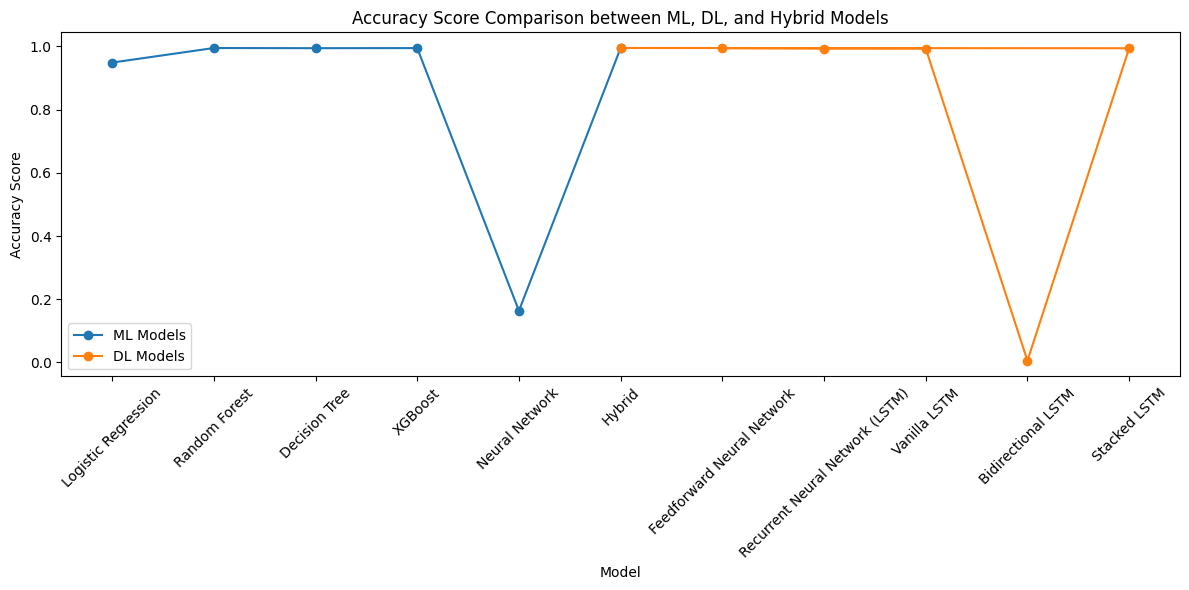

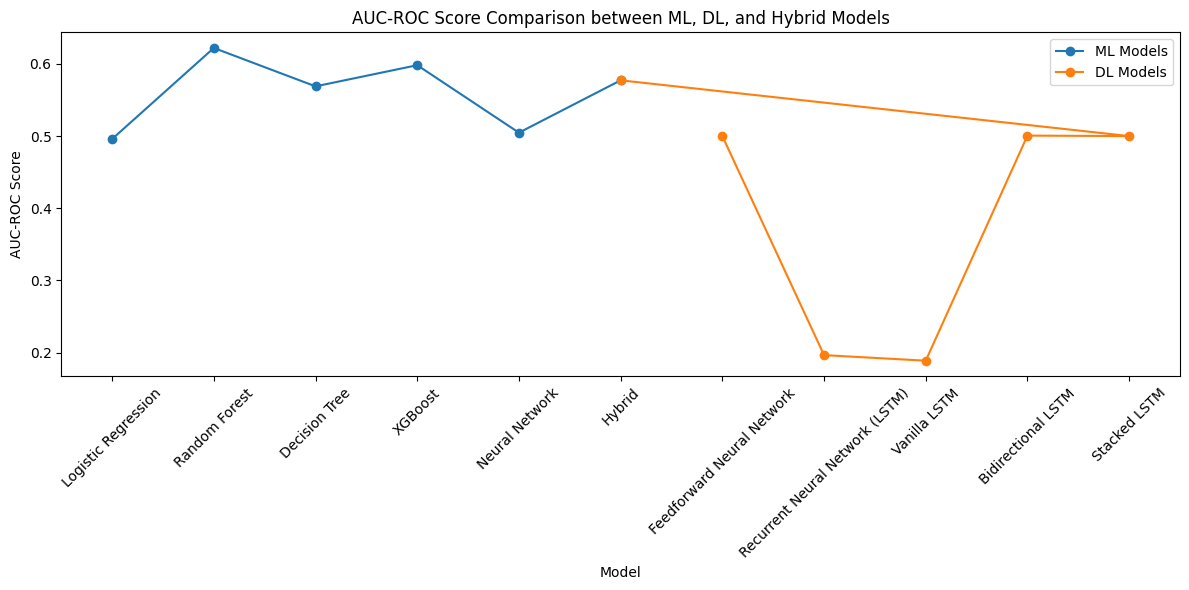

Voting Classifier Results:
Accuracy: 0.9953
AUC-ROC: 0.5773
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    826543
           1       0.97      0.15      0.27      4580

    accuracy                           1.00    831123
   macro avg       0.98      0.58      0.63    831123
weighted avg       1.00      1.00      0.99    831123



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


# Create dictionaries to store results
ml_results = dict()
dl_results = dict()

# Store results for ML models
for result in results_oversampled:
    ml_results[result[0]] = {'accuracy': result[1], 'auc_roc': result[4]}

# Store results for DL models
for result in results_deep:
    dl_results[result[0]] = {'accuracy': result[1], 'auc_roc': result[4]}

# Add results for the hybrid model
ml_results['Hybrid'] = {'accuracy': hybrid_accuracy, 'auc_roc': hybrid_auc_roc}
dl_results['Hybrid'] = {'accuracy': hybrid_accuracy, 'auc_roc': hybrid_auc_roc}

# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
plt.plot(ml_results.keys(), [res['accuracy'] for res in ml_results.values()], marker='o', label='ML Models')
plt.plot(dl_results.keys(), [res['accuracy'] for res in dl_results.values()], marker='o', label='DL Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot AUC-ROC Comparison
plt.figure(figsize=(12, 6))
plt.plot(ml_results.keys(), [res['auc_roc'] for res in ml_results.values()], marker='o', label='ML Models')
plt.plot(dl_results.keys(), [res['auc_roc'] for res in dl_results.values()], marker='o', label='DL Models')
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score Comparison between ML, DL, and Hybrid Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Display Classification Report for Voting Classifier
print("Voting Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Classification Report:\n", classification_rep)